In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_excel("/content/Diabetes_early_detections.xlsx")
data.head()

,Patient ID,Name,Age,Gender,HbA1c_level,Diabetes,BloodPressure,Blood_glucose_level,BMI,Urea Test,...,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,DPID 01,Methuen,80,Male,0.035,Normal,72,140.0,25.19,4.7,...,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,DPID 02,Buff,54,Male,0.035,Normal,66,80.0,27.32,4.5,...,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,DPID 03,Goudie,28,Male,0.035,Normal,64,158.0,27.32,4.7,...,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,DPID 04,McMurty,36,Male,0.035,Normal,40,155.0,23.45,4.7,...,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,DPID 05,Helgass,76,Female,0.035,Normal,74,155.0,20.14,7.1,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
data.columns

Index(['Patient ID', 'Name', 'Age', 'Gender', 'HbA1c_level', 'Diabetes',
       'BloodPressure', 'Blood_glucose_level', 'BMI', 'Urea Test', 'Cr Test',
       'Chol Test', 'TG Test', 'HDL Test', 'LDL Test', 'VLDL Test',
       'Hypertension', 'Heart_disease', 'Smoking_history', 'Skin Thickness',
       'Polyuria', 'Polydipsia', 'Sudden weight loss', 'Weakness',
       'Polyphagia', 'Genital thrush', 'Visual blurring', 'Itching',
       'Irritability', 'Delayed healing', 'Partial paresis',
       'Muscle stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')

In [4]:
data.isnull().sum()

,0
Patient ID,0
Name,0
Age,0
Gender,0
HbA1c_level,0
Diabetes,0
BloodPressure,0
Blood_glucose_level,1
BMI,0
Urea Test,0


In [5]:
data['Diabetes'].value_counts()

,count
Diabetes,
Pre Diabetes,2172
Normal,1844
Diabetic,984


In [6]:
data['Smoking_history'].value_counts()

,count
Smoking_history,
NEVER,1809
NO INFO,1768
FORMER,473
CURRENT,472
NOT CURRENT,290
EVER,188


In [7]:
data.dtypes

,0
Patient ID,object
Name,object
Age,int64
Gender,object
HbA1c_level,float64
Diabetes,object
BloodPressure,int64
Blood_glucose_level,float64
BMI,float64
Urea Test,float64


In [8]:
 data.drop(['Patient ID'], axis=1, inplace=True)
data.drop(['Name'], axis=1, inplace=True)

In [9]:
data.head()

,Age,Gender,HbA1c_level,Diabetes,BloodPressure,Blood_glucose_level,BMI,Urea Test,Cr Test,Chol Test,...,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,80,Male,0.035,Normal,72,140.0,25.19,4.7,46,4.2,...,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,54,Male,0.035,Normal,66,80.0,27.32,4.5,62,3.7,...,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,28,Male,0.035,Normal,64,158.0,27.32,4.7,46,4.2,...,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,36,Male,0.035,Normal,40,155.0,23.45,4.7,46,4.2,...,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,76,Female,0.035,Normal,74,155.0,20.14,7.1,46,4.9,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


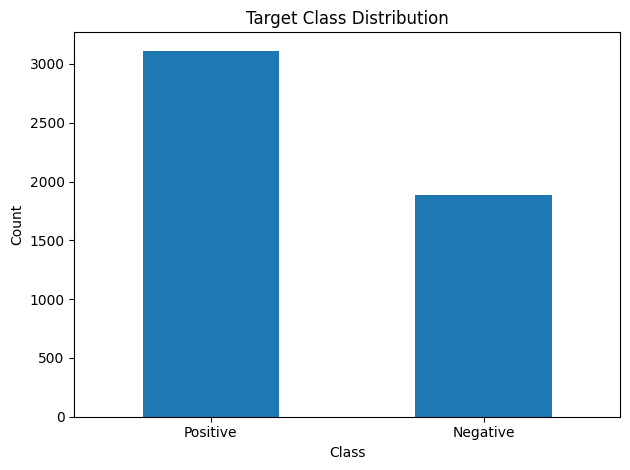

In [10]:
plt.figure()
data["Class"].value_counts().plot(kind="bar")
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


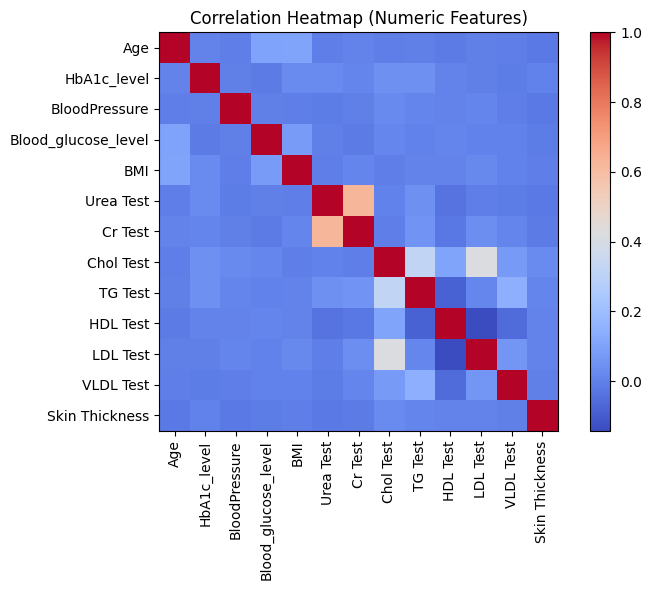

In [12]:
num_cols = data.select_dtypes(include=[np.number]).columns
corr = data[num_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

In [13]:

# Separate features and target
X = data.drop(columns="Class")
y = data["Class"].map({"Positive": 1, "Negative": 0})

In [14]:
X["Blood_glucose_level"].fillna(X["Blood_glucose_level"].median(), inplace=True)


<ipython-input-14-3899702645>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Blood_glucose_level"].fillna(X["Blood_glucose_level"].median(), inplace=True)


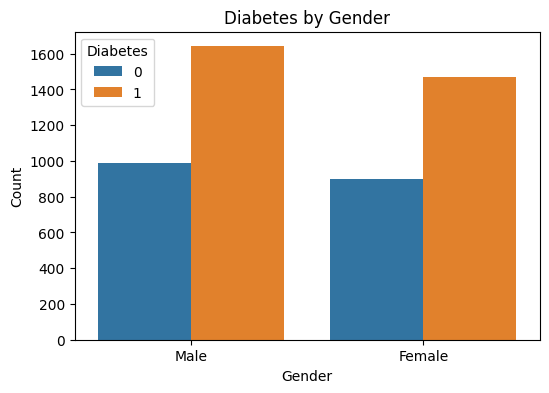

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue=y, data=X.join(y))
plt.title("Diabetes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Diabetes")
plt.show()


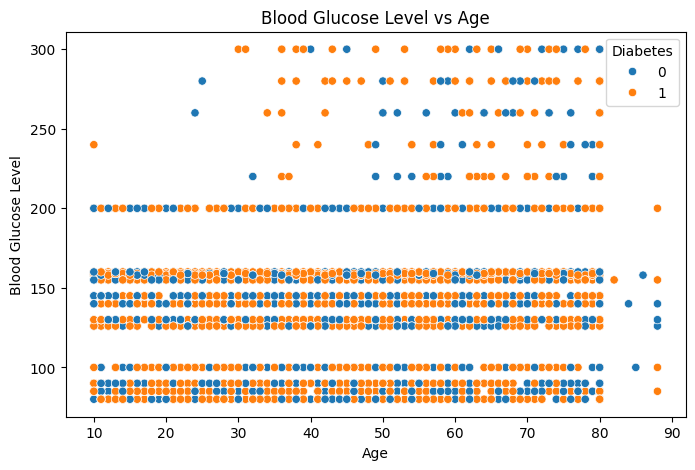

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X.join(y), x="Age", y="Blood_glucose_level", hue=y)
plt.title("Blood Glucose Level vs Age")
plt.xlabel("Age")
plt.ylabel("Blood Glucose Level")
plt.legend(title="Diabetes")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [21]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])


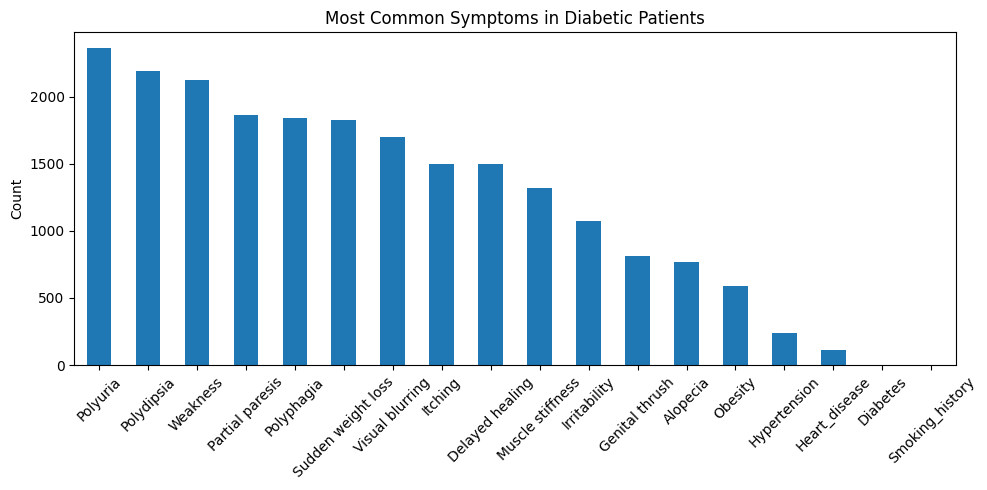

In [24]:
symptom_cols = [col for col in cat_cols if col not in ["Gender"]]
diabetic = X[y == 1]

plt.figure(figsize=(10, 5))
(diabetic[symptom_cols] == "Yes").sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Most Common Symptoms in Diabetic Patients")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
import numpy as np

X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))


In [82]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_final, y_train)
print("LR Accuracy:", model_lr.score(X_test_final, y_test))


LR Accuracy: 0.86


In [83]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=300, random_state=42)
model_rf.fit(X_train_final, y_train)
print("RF Accuracy:", model_rf.score(X_test_final, y_test))


RF Accuracy: 0.982


In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_final, y_train)
print("GB Accuracy:", model_gb.score(X_test_final, y_test))


GB Accuracy: 0.968


In [85]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model_rf.predict(X_test_final)
y_proba = model_rf.predict_proba(X_test_final)[:, 1]
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       377
           1       1.00      0.97      0.99       623

    accuracy                           0.98      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.98      0.98      0.98      1000

AUC: 0.9960488949252994
